In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Вопросы карьеры.csv to Вопросы карьеры.csv
Saving Вредные привычки, зависимость.csv to Вредные привычки, зависимость.csv
Saving Горе, потери.csv to Горе, потери.csv
Saving Депрессия.csv to Депрессия.csv
Saving Нервные расстройства.csv to Нервные расстройства.csv
Saving О достижении цели.csv to О достижении цели.csv
Saving Отношения с окружающими.csv to Отношения с окружающими.csv
Saving Поиск решения.csv to Поиск решения.csv
Saving Проблемы с детьми.csv to Проблемы с детьми.csv
Saving Проблемы с партнером.csv to Проблемы с партнером.csv
Saving Размышления о мире.csv to Размышления о мире.csv
Saving Самопознание, саморазвитие.csv to Самопознание, саморазвитие.csv
Saving Семейные проблемы.csv to Семейные проблемы.csv


In [ ]:
!ls

 sample_data			     'Отношения с окружающими.csv'
'Вопросы карьеры.csv'		     'Поиск решения.csv'
'Вредные привычки, зависимость.csv'  'Проблемы с детьми.csv'
'Горе, потери.csv'		     'Проблемы с партнером.csv'
 Депрессия.csv			     'Размышления о мире.csv'
'Нервные расстройства.csv'	     'Самопознание, саморазвитие.csv'
'О достижении цели.csv'		     'Семейные проблемы.csv'


Let's create 2 files: training and test data

test data - 20%

In [ ]:
from sklearn.model_selection import train_test_split
import os
import glob

In [ ]:
extension = 'csv'
file_names = [i for i in glob.glob('*.{}'.format(extension))]
file_names_size = len(file_names);

Let's mark the data: add a column in which the value will mean the category number

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_train = []
data_test = []

i = 0
while i<file_names_size:
  df = pd.read_csv(file_names[i], header=0)
  df['THEME'] = i
  train, test = train_test_split(df, test_size=0.2)
  data_train.append(train)
  data_test.append(test)
  i = i + 1

In [ ]:
data_test[7][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
390,390,u455467,Takanika,Как объяснить ребёнку развод,Добрый день! Ситуация такая: имеется дочь 2 ле...,2019-08-28 16:14,1,https://www.b17.ru/forum/topic.php?id=178090,7
215,215,u479450,kapella17,Панически боюсь заводить ребенка.,"Здравствуйте. Мне 27 лет, замужем шестой год. ...",2019-11-28 10:02,1,https://www.b17.ru/forum/topic.php?id=191222,7
372,372,u257473,Вопрос ительница,Адаптация к яслям,"Здравствуйте, уважаемые специалисты! Сейчас мн...",2019-09-04 13:58,1,https://www.b17.ru/forum/topic.php?id=179024,7


In [ ]:
data_train[2][:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
649,649,u599594,Maruisa,Какой тип темперамента???,Здравствуйте! Очень интересует вопрос о собств...,2020-02-13 13:03,3,https://www.b17.ru/forum/topic.php?id=302482,2
1008,1008,u239380,Наташа46,Конфликт на работе,Прошу помощи!Обещаю помогать при работе)Очень ...,2019-12-08 07:54,2,https://www.b17.ru/forum/topic.php?id=192676,2
490,490,u606530,Георцина,Как выбирать кого-то с сайтов знакомств ?,Если мужчины все одинаковые?Вот допустим встре...,2020-03-11 15:21,1,https://www.b17.ru/forum/topic.php?id=306220,2


combining the data into a single file

-train

In [ ]:
final_data_train = pd.concat(data_train)
final_data_train.to_csv( 'train.csv', index=False, encoding='utf-8-sig')

In [ ]:
!wc -l train.csv

29530 train.csv


-test

In [ ]:
final_data_test = pd.concat(data_test)
final_data_test.to_csv( "test.csv", index=False, encoding='utf-8-sig')

In [ ]:
!wc -l test.csv

2642 test.csv


In [ ]:
train = pd.read_csv('train.csv', header=0)
train[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,829,u468698,EvaMenfri,Личность расщепляется,Привет. Мне 18 лет. Я переезжала 4 раза за сво...,2019-10-20 22:00,2,https://www.b17.ru/forum/topic.php?id=185499,0
1,889,u465247,Наталия #465247,"ПА, депрессия, проблемы с мамой",Здравствуйте. Полгода назад начались лёгкие пе...,2019-10-08 17:43,2,https://www.b17.ru/forum/topic.php?id=183697,0
2,935,u459309,Lena_905435,Нервное расстройство мамы,Добрый день! Я мама двоих детей 6 и два года. ...,2019-09-24 16:53,0,https://www.b17.ru/forum/topic.php?id=181727,0


In [ ]:
test = pd.read_csv('test.csv', header=0)
test[:3]

,Unnamed: 0,USER_ID,USER_NICKNAME,TITLE,MESSAGE,DATE_TIME,TOPIC_LIKES_COUNT,URL,THEME
0,82,u622719,Julia555,Как справится с приступом ипохондрии?,"Доброго времени суток!Уважаемые специалисты, к...",2020-05-13 18:32,5,https://www.b17.ru/forum/topic.php?id=314622,0
1,43,u622778,Anastezija,РПП,"Добрый день, меня зовут Ася, мне 25 лет. Работ...",2020-05-13 23:01,0,https://www.b17.ru/forum/topic.php?id=314660,0
2,42,u429648,Евгения312,Окр,Здравствуйте Валерий Юрьевич.Моя проблема что ...,2020-02-10 19:26,4,https://www.b17.ru/forum/topic.php?id=302072,0


In [ ]:
from tensorflow.keras import utils

In [ ]:
trb_nan_idx = train[pd.isnull(train['MESSAGE'])].index.tolist()
train.loc[trb_nan_idx, 'MESSAGE'] = ' '
train.loc[trb_nan_idx, 'MESSAGE'] = ' '

TypeError: ignored

In [ ]:
x_train = train['MESSAGE']
y_train = utils.to_categorical(train['THEME'],file_names_size)

TypeError: ignored

In [ ]:
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("russian")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def token_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[а-яА-Я]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    print(type(stems))
    return stems

In [ ]:
upd_x_train = []
i = 0

while i<file_names_size:
  upd_train = token_and_stem(x_train[i])
  upd_x_train.append(upd_train)
  i = i + 1

In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('russian')
#можно расширить список стоп-слов
stopwords.extend(['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tokens = []
train = []

for x_tr in upd_x_train:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  train.append(tokens)
  tokens = []

In [ ]:
x_train[:3]

array([[2741,   19,  390,    5,    7, 1426,    3,   38,  512, 1096,    8,
          98,  481,  124,    3,  106,  758,    3,   36,  828,   20,  454,
           4,   54,   36,  828,    6, 3778,   10,  958,  528,   13,   31,
           3,  769,  180,   71,   22, 2330,  293,    3,   38,  270, 2742,
         292,  135,    3,  189, 1375,    4,  203,  484,   17, 1533,    6,
           1,  182,    3,  302,    5,   23,  121,  962,    2,  959,   63,
          67,   73,   35,    3,    8,  152,    2, 4507, 1376,    5,   23,
          11,  959,   13,  552,   13,    1,  175,  758,  259,   12,  249,
           3,    2,   36,   18,   73, 3715,    3,   40, 1427,   12,   22,
         650],
       [  24, 1450, 4807,   73,    2, 3380,    7,   11,    1,  877,  324,
           3,    2,   40,  174,  216,  475,   38, 2507,   27,  366, 1186,
        1589,   18,    3,   75,   11, 3045,    4,  267, 3129,  379,  142,
           4,  536,  154,    2,  267,  868,  209,   12,   45,    1, 2956,
          41,  125,  14

In [ ]:
x_train

array([[2741,   19,  390, ...,   12,   22,  650],
       [  24, 1450, 4807, ..., 1451,    1, 1068],
       [   0,    0,    0, ...,    8,   61,  250],
       ...,
       [  96,   86,    6, ...,    1,    2, 2989],
       [ 255,   59, 4387, ...,  319,    4,   61],
       [   0,    0,    0, ..., 1460,    6,    1]], dtype=int32)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
upd_tokenizer = Tokenizer(num_words=num_words, filters='0123456789!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')

In [ ]:
tokenizer.fit_on_texts(x_train)
upd_tokenizer.fit_on_texts(train)

In [ ]:
tokenizer.word_index

In [ ]:
upd_tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(x_train)
upd_sequences = upd_tokenizer.texts_to_sequences(train)

In [ ]:
print(x_train[0])
print(sequences[0])
print(train[0])
print(upd_sequences[0])

Привет. Мне 18 лет. Я переезжала 4 раза за свою жизнь в разные города.Уже 3 год меня не покидает комок в горле, ненависть к себе,  родителям и всему живому и вечная скованность с другими людьми.  У меня есть друзья, но никто из них не знает о моих настоящих чувствах. С ними я веду себя всегда как клоун, чтоб им было весело. Рассказать о настоящем для меня сложнее, чем поднять 10 тонную тяжесть. Слишком стыдно, и меня уж точно никто не поймет. Я постоянно притворяюсь, играю какие-то роли. Пытаюсь возненавидеть тех, кто мне нравится (так как не могу с ними общаться), и при этом снаружи я стараюсь им понравится и угодить. В этот момент я выгляжу примерно как камень, который старается корчить "лыбу" и говорить "приятные" слова. Я лицемерка.На улицу выходить мне тяжело, всегда складывается ощущение, что мне нужно соответствовать каким-то стандартам. Это приводит к тому, что на улицу я просто стараюсь выходить как можно меньше. Дома я постоянно плачу. Я могу плакать по 3 раза в день. Могу пл

In [ ]:
max_text_len = 100
x_train = pad_sequences(sequences, maxlen=max_text_len)
upd_x_train = pad_sequences(upd_sequences, maxlen=max_text_len)

In [ ]:
x_train[0]

array([2741,   19,  390,    5,    7, 1426,    3,   38,  512, 1096,    8,
         98,  481,  124,    3,  106,  758,    3,   36,  828,   20,  454,
          4,   54,   36,  828,    6, 3778,   10,  958,  528,   13,   31,
          3,  769,  180,   71,   22, 2330,  293,    3,   38,  270, 2742,
        292,  135,    3,  189, 1375,    4,  203,  484,   17, 1533,    6,
          1,  182,    3,  302,    5,   23,  121,  962,    2,  959,   63,
         67,   73,   35,    3,    8,  152,    2, 4507, 1376,    5,   23,
         11,  959,   13,  552,   13,    1,  175,  758,  259,   12,  249,
          3,    2,   36,   18,   73, 3715,    3,   40, 1427,   12,   22,
        650], dtype=int32)

In [ ]:
upd_x_train[0]

array([ 11,  39,   1, 350, 111, 351, 352, 180, 353, 181, 182,  12, 111,
       354, 355,  18, 356,  27, 357,  56, 112,  78, 109, 358, 359,  79,
       360, 183, 361,   1, 184,  56,  40, 111, 112,  41, 362,  19,  14,
       185,  11, 113,  28,  11, 113, 182, 363, 364, 365, 366,   1, 367,
       368, 369, 370,  20, 371,  29, 372, 373,  40, 374,  42, 186, 375,
        10, 376, 377, 187, 378, 188,  80,   3,  81, 114, 379, 115,  57,
        13,  35, 189, 380, 381,   2, 114,   1, 382, 383,   1, 384, 185,
       190, 191,  11,  35, 385,  21, 386,  29, 387], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU

In [ ]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_text_len))
model_cnn.add(Conv1D(3*file_names_size**2, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(file_names_size**2, activation='relu'))
model_cnn.add(Dense(file_names_size, activation='softmax'))

In [ ]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 96, 507)           81627     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 507)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 169)               85852     
_________________________________________________________________
dense_7 (Dense)              (None, 13)                2210      
Total params: 329,689
Trainable params: 329,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
upd_model_cnn_save_path = 'upd_best_model_cnn.h5'
upd_checkpoint_callback_cnn = ModelCheckpoint(upd_model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=50,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/50
33/33 [==============================] - 13s 366ms/step - loss: 2.4496 - accuracy: 0.0976 - val_loss: 5.4672 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_cnn.h5
Epoch 2/50
33/33 [==============================] - 12s 362ms/step - loss: 2.3629 - accuracy: 0.1353 - val_loss: 6.7745 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/50
33/33 [==============================] - 12s 361ms/step - loss: 2.2945 - accuracy: 0.1931 - val_loss: 7.8531 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/50
33/33 [==============================] - 12s 361ms/step - loss: 2.1129 - accuracy: 0.2593 - val_loss: 9.0577 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/50
33/33 [==============================] - 12s 362ms/step - loss: 1.9075 - accuracy: 0.3458 - val_loss: 10.2419 - val_accuracy: 9.4922e-04

Epo

In [ ]:
upd_history_cnn = model_cnn.fit(upd_x_train, 
                            y_train, 
                            epochs=50,
                            batch_size=256,
                            validation_split=0.2,
                            callbacks=[upd_checkpoint_callback_cnn])

Epoch 1/50
1/1 [==============================] - 0s 64ms/step - loss: 8.7127 - accuracy: 0.1000 - val_loss: 4.3450 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to upd_best_model_cnn.h5
Epoch 2/50
1/1 [==============================] - 0s 40ms/step - loss: 0.4510 - accuracy: 0.9000 - val_loss: 1.1890 - val_accuracy: 0.6667

Epoch 00002: val_accuracy did not improve from 0.66667
Epoch 3/50
1/1 [==============================] - 0s 39ms/step - loss: 1.8239e-06 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000

Epoch 00003: val_accuracy improved from 0.66667 to 1.00000, saving model to upd_best_model_cnn.h5
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.7815e-06 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/50
1/1 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 -

In [ ]:
import matplotlib.pyplot as plt

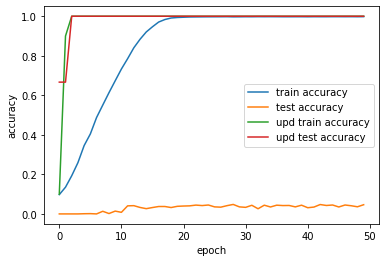

In [ ]:
plt.plot(history_cnn.history['accuracy'], 
         label='train accuracy')
plt.plot(history_cnn.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_cnn.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_cnn.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_text_len))
model_lstm.add(LSTM(169))
model_lstm.add(Dense(13, activation='softmax'))

In [ ]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 169)               136552    
_________________________________________________________________
dense_8 (Dense)              (None, 13)                2210      
Total params: 298,762
Trainable params: 298,762
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
upd_model_lstm_save_path = 'upd_best_model_lstm.h5'
upd_checkpoint_callback_lstm = ModelCheckpoint(upd_model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(x_train, 
                              y_train, 
                              epochs=50,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/50
33/33 [==============================] - 58s 666ms/step - loss: 2.4412 - accuracy: 0.0969 - val_loss: 5.6207 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_lstm.h5
Epoch 2/50
33/33 [==============================] - 21s 644ms/step - loss: 2.3830 - accuracy: 0.1011 - val_loss: 6.1223 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/50
33/33 [==============================] - 21s 635ms/step - loss: 2.3645 - accuracy: 0.1264 - val_loss: 5.2484 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/50
33/33 [==============================] - 21s 645ms/step - loss: 2.2720 - accuracy: 0.2031 - val_loss: 5.6280 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/50
33/33 [==============================] - 21s 644ms/step - loss: 2.0954 - accuracy: 0.2700 - val_loss: 5.2818 - val_accuracy: 0.0000e+00

Epo

In [ ]:
upd_history_lstm = model_lstm.fit(upd_x_train, 
                              y_train, 
                              epochs=50,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_lstm])

Epoch 1/50
1/1 [==============================] - 0s 161ms/step - loss: 5.3266 - accuracy: 0.2000 - val_loss: 7.0694 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to upd_best_model_lstm.h5
Epoch 2/50
1/1 [==============================] - 0s 139ms/step - loss: 2.7138 - accuracy: 0.6000 - val_loss: 4.3280 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/50
1/1 [==============================] - 0s 131ms/step - loss: 0.6184 - accuracy: 0.9000 - val_loss: 0.0371 - val_accuracy: 1.0000

Epoch 00003: val_accuracy improved from 0.00000 to 1.00000, saving model to upd_best_model_lstm.h5
Epoch 4/50
1/1 [==============================] - 0s 141ms/step - loss: 0.4109 - accuracy: 0.9000 - val_loss: 3.0112e-04 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/50
1/1 [==============================] - 0s 130ms/step - loss: 7.5707e-05 - accuracy: 1.0000 - val_loss: 4.605

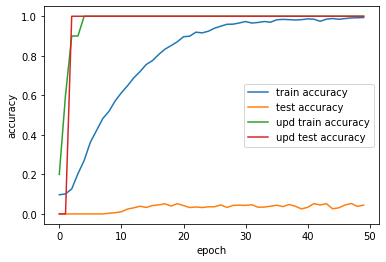

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='train accuracy')
plt.plot(history_lstm.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_lstm.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_lstm.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_text_len))
model_gru.add(GRU(169))
model_gru.add(Dense(13, activation='softmax'))

In [ ]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 32)           160000    
_________________________________________________________________
gru_2 (GRU)                  (None, 169)               102921    
_________________________________________________________________
dense_10 (Dense)             (None, 13)                2210      
Total params: 265,131
Trainable params: 265,131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
upd_model_gru_save_path = 'upd_best_model_gru.h5'
upd_checkpoint_callback_gru = ModelCheckpoint(upd_model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
upd_history_gru = model_gru.fit(upd_x_train, 
                              y_train, 
                              epochs=50,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[upd_checkpoint_callback_gru])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 2.5650 - accuracy: 0.0000e+00 - val_loss: 2.5354 - val_accuracy: 0.6667

Epoch 00001: val_accuracy improved from -inf to 0.66667, saving model to upd_best_model_gru.h5
Epoch 2/50
1/1 [==============================] - 0s 100ms/step - loss: 2.5337 - accuracy: 1.0000 - val_loss: 2.5094 - val_accuracy: 1.0000

Epoch 00002: val_accuracy improved from 0.66667 to 1.00000, saving model to upd_best_model_gru.h5
Epoch 3/50
1/1 [==============================] - 0s 109ms/step - loss: 2.5004 - accuracy: 1.0000 - val_loss: 2.4788 - val_accuracy: 1.0000

Epoch 00003: val_accuracy did not improve from 1.00000
Epoch 4/50
1/1 [==============================] - 0s 105ms/step - loss: 2.4624 - accuracy: 1.0000 - val_loss: 2.4418 - val_accuracy: 1.0000

Epoch 00004: val_accuracy did not improve from 1.00000
Epoch 5/50
1/1 [==============================] - 0s 101ms/step - loss: 2.4176 - accuracy: 1.0000 - val_loss: 2.3959 - val_accuracy:

In [ ]:
history_gru = model_gru.fit(x_train, 
                              y_train, 
                              epochs=50,
                              batch_size=256,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/50
33/33 [==============================] - 18s 536ms/step - loss: 8.6024 - accuracy: 0.0946 - val_loss: 2.7080 - val_accuracy: 0.0000e+00

Epoch 00001: val_accuracy improved from -inf to 0.00000, saving model to best_model_gru.h5
Epoch 2/50
33/33 [==============================] - 17s 532ms/step - loss: 2.5087 - accuracy: 0.1174 - val_loss: 3.0066 - val_accuracy: 0.0000e+00

Epoch 00002: val_accuracy did not improve from 0.00000
Epoch 3/50
33/33 [==============================] - 17s 529ms/step - loss: 2.4445 - accuracy: 0.1525 - val_loss: 3.6813 - val_accuracy: 0.0000e+00

Epoch 00003: val_accuracy did not improve from 0.00000
Epoch 4/50
33/33 [==============================] - 17s 528ms/step - loss: 2.3767 - accuracy: 0.1850 - val_loss: 4.9166 - val_accuracy: 0.0000e+00

Epoch 00004: val_accuracy did not improve from 0.00000
Epoch 5/50
33/33 [==============================] - 17s 527ms/step - loss: 2.3187 - accuracy: 0.2821 - val_loss: 5.9582 - val_accuracy: 0.0000e+00

Epoc

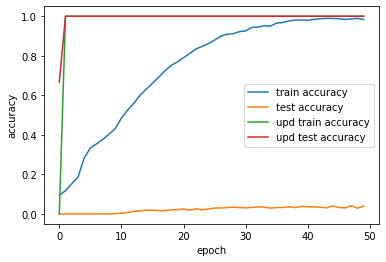

In [ ]:
plt.plot(history_gru.history['accuracy'], 
         label='train accuracy')
plt.plot(history_gru.history['val_accuracy'], 
         label='test accuracy')
plt.plot(upd_history_gru.history['accuracy'], 
         label='upd train accuracy')
plt.plot(upd_history_gru.history['val_accuracy'], 
         label='upd test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
x_test = test['MESSAGE']

In [ ]:
upd_x_test = []
i = 0

while i<file_names_size:
  upd_test = token_and_stem(x_test[i])
  upd_x_test.append(upd_test)
  i = i + 1

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
tokens = []
test = []

for x_tr in upd_x_test:
  for token in x_tr:
    if token not in stopwords:
      tokens.append(token)
  test.append(tokens)
  tokens = []

In [ ]:
test_sequences = tokenizer.texts_to_sequences(x_test)
upd_test_sequences = upd_tokenizer.texts_to_sequences(test)

In [ ]:
x_test = pad_sequences(test_sequences, maxlen=max_text_len)
upd_x_test = pad_sequences(upd_test_sequences, maxlen=max_text_len)

In [ ]:
y_test = utils.to_categorical(test['THEME'],file_names_size)

In [ ]:
model_cnn.load_weights(model_cnn_save_path)
model_cnn.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 1s 10ms/step - loss: 10.0252 - accuracy: 0.3033


[10.02521800994873, 0.30326005816459656]

In [ ]:
model_cnn.load_weights(upd_model_cnn_save_path)
model_cnn.evaluate(upd_x_test, y_test, verbose=1)

ValueError: ignored

In [ ]:
model_lstm.load_weights(model_lstm_save_path)

In [ ]:
model_lstm.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 4s 53ms/step - loss: 5.8177 - accuracy: 0.2820


[5.817650318145752, 0.2820318341255188]

In [ ]:
model_gru.load_weights(model_gru_save_path)

In [ ]:
model_gru.evaluate(x_test, y_test, verbose=1)

83/83 [==============================] - 2s 30ms/step - loss: 6.8351 - accuracy: 0.2005


[6.835122108459473, 0.20053070783615112]